In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### TASK 1: LOAD DATASET & EDA

In [3]:
df = pd.read_csv("C:/Users/harik/Data science Assignment/wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data = df.select_dtypes(include=[np.number])

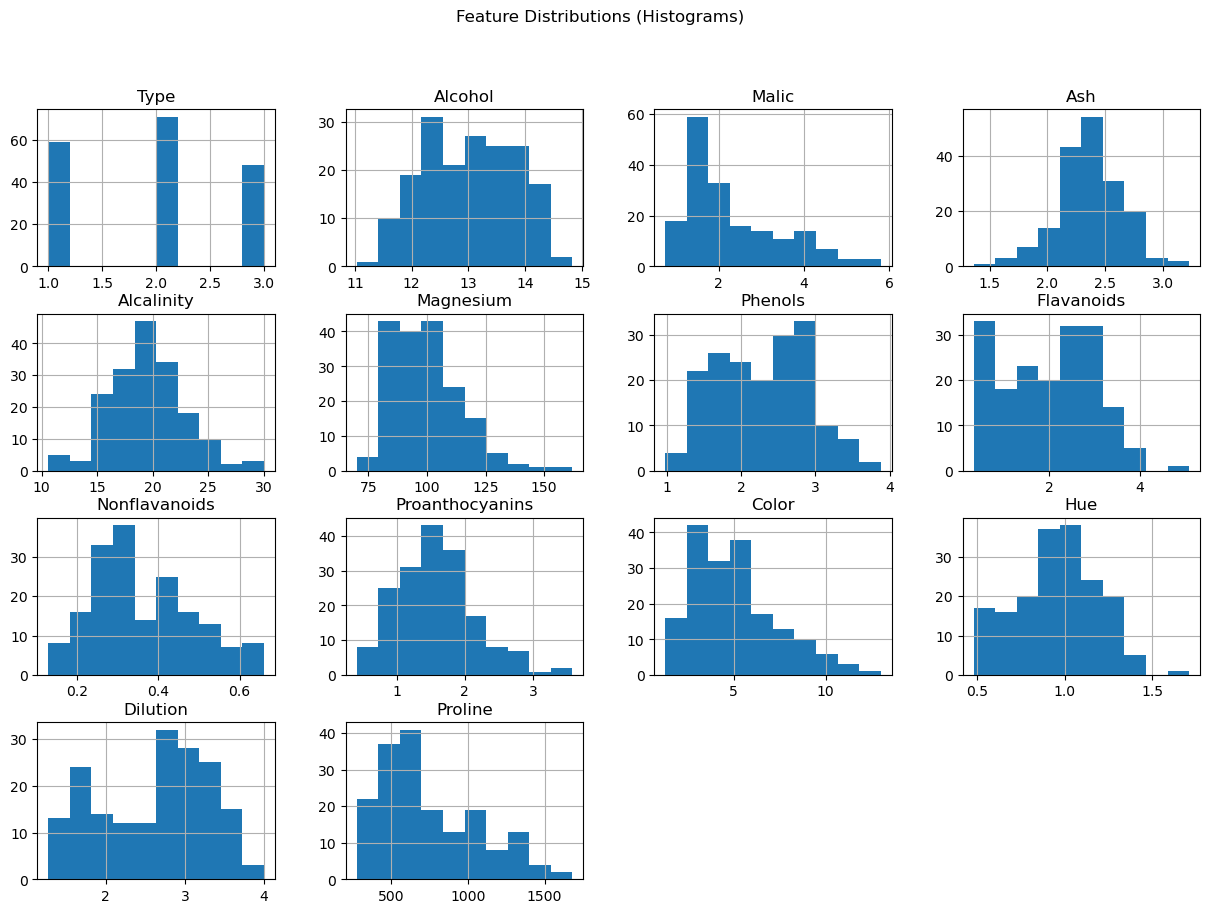

In [10]:
data.hist(figsize=(15, 10))
plt.suptitle("Feature Distributions (Histograms)")
plt.show()

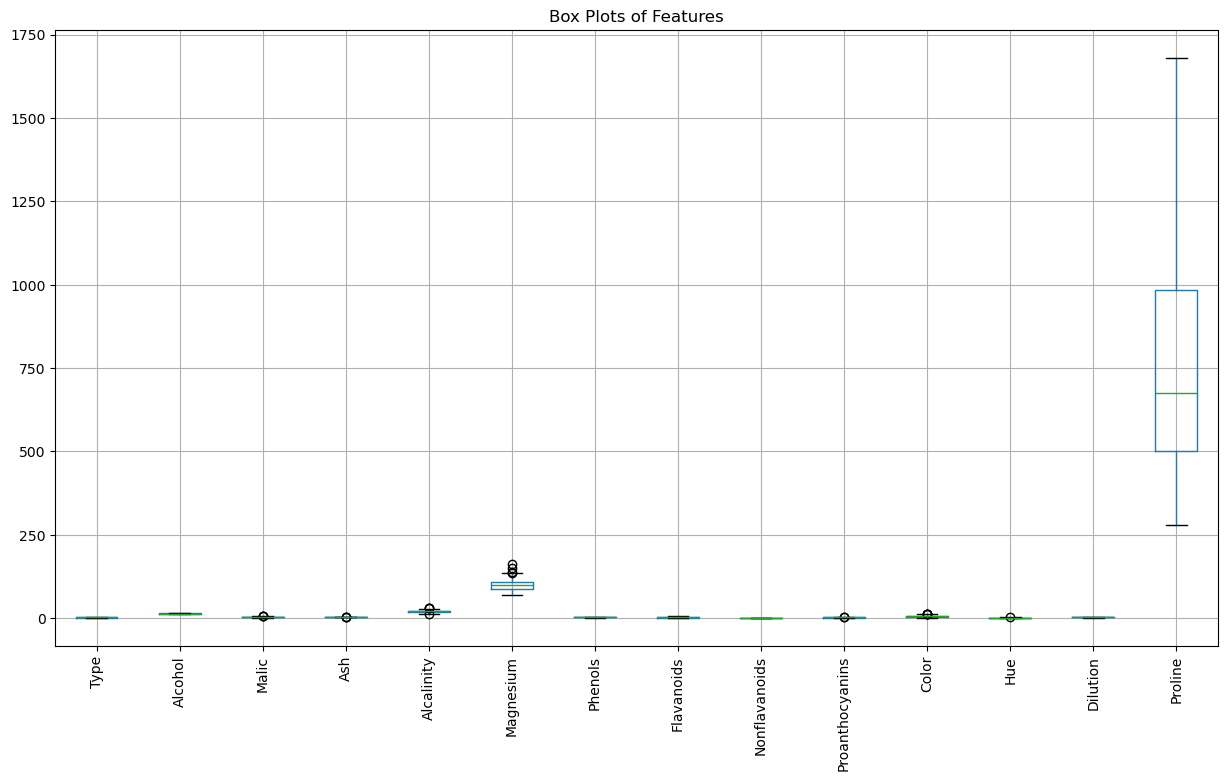

In [11]:
plt.figure(figsize=(15, 8))
data.boxplot()
plt.title("Box Plots of Features")
plt.xticks(rotation=90)
plt.show()

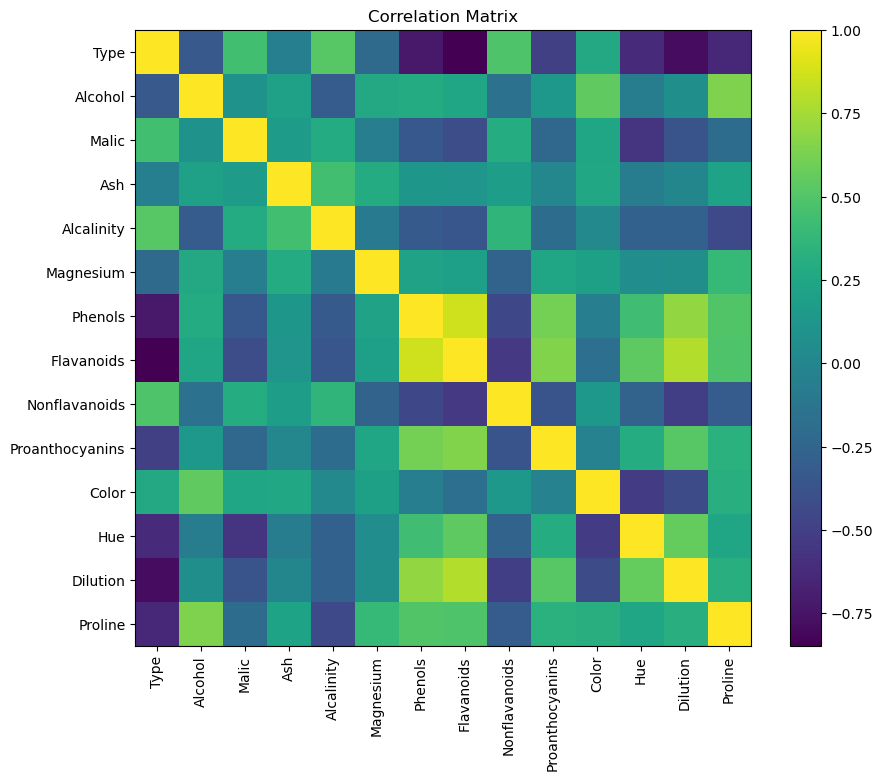

In [12]:
corr = data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

#### TASK 2: STANDARDIZATION + PCA

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

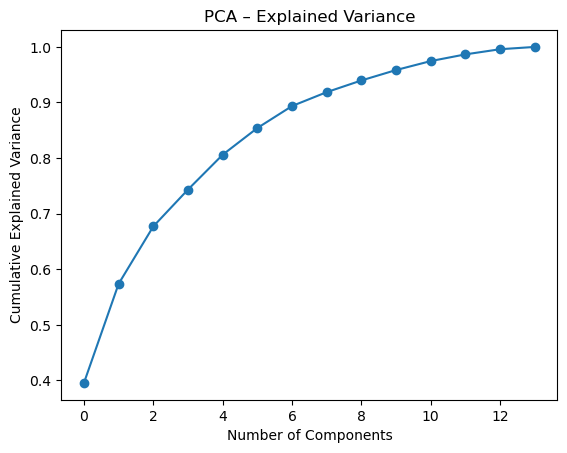

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA for explained variance
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Explained Variance")
plt.show()

In [18]:
pca = PCA(n_components=2)
pca_data_2d = pca.fit_transform(scaled_data)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.39542486 0.17836259]


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

#### TASK 3: CLUSTERING ON ORIGINAL DATA

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Original Data Clustering
Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


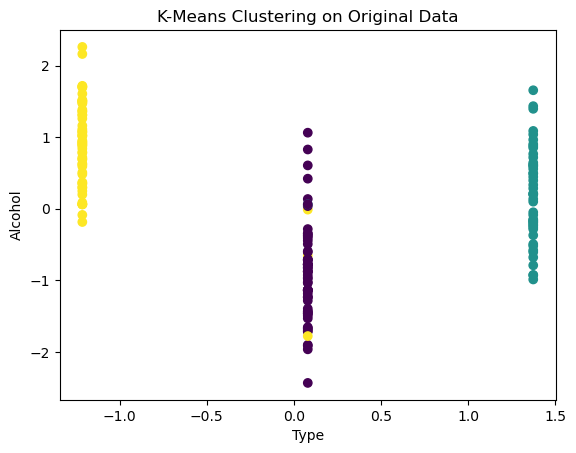

In [20]:
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)

sil_original = silhouette_score(scaled_data, clusters_original)
db_original = davies_bouldin_score(scaled_data, clusters_original)

print("\nOriginal Data Clustering")
print("Silhouette Score:", sil_original)
print("Davies-Bouldin Index:", db_original)

plt.figure()
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_original)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title("K-Means Clustering on Original Data")
plt.show()

#### TASK 4: CLUSTERING ON PCA DATA

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



PCA Data Clustering
Silhouette Score: 0.6024415520362845
Davies-Bouldin Index: 0.5397078562575711


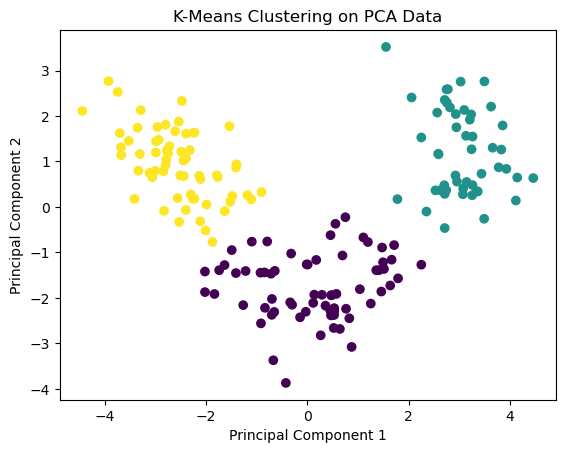

In [21]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data_2d)

sil_pca = silhouette_score(pca_data_2d, clusters_pca)
db_pca = davies_bouldin_score(pca_data_2d, clusters_pca)

print("\nPCA Data Clustering")
print("Silhouette Score:", sil_pca)
print("Davies-Bouldin Index:", db_pca)

plt.figure()
plt.scatter(pca_data_2d[:, 0], pca_data_2d[:, 1], c=clusters_pca)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA Data")
plt.show()

#### TASK 5: COMPARISON

In [22]:
comparison = pd.DataFrame({
    "Method": ["Original Data", "PCA Data"],
    "Silhouette Score": [sil_original, sil_pca],
    "Davies-Bouldin Index": [db_original, db_pca]
})

print("\nClustering Performance Comparison")
print(comparison)


Clustering Performance Comparison
          Method  Silhouette Score  Davies-Bouldin Index
0  Original Data          0.306484              1.315708
1       PCA Data          0.602442              0.539708
